# MODELO - BOOSTING - REGRESION

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
data = pd.read_pickle('df_final_kaagle.pkl')

In [3]:
data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'city_code',
       'item_category_id', 'type_code', 'subtype_code', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'date_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_2',
       'date_item_avg_item_cnt_lag_3', 'date_item_avg_item_cnt_lag_6',
       'date_item_avg_item_cnt_lag_12', 'date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_2', 'date_shop_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_6', 'date_shop_avg_item_cnt_lag_12',
       'date_cat_avg_item_cnt_lag_1', 'date_shop_cat_avg_item_cnt_lag_1',
       'date_shop_type_avg_item_cnt_lag_1',
       'date_shop_subtype_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1', 'date_type_avg_item_cnt_lag_1',
       'date_subtype_avg_item_cnt_lag_1', 'delta_price_lag', 'month', 'day

In [4]:
data.shape

(6365581, 57)

Graficamos las ventas por mes

/Users/cesarhernandez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cnt_month', ylabel='count'>

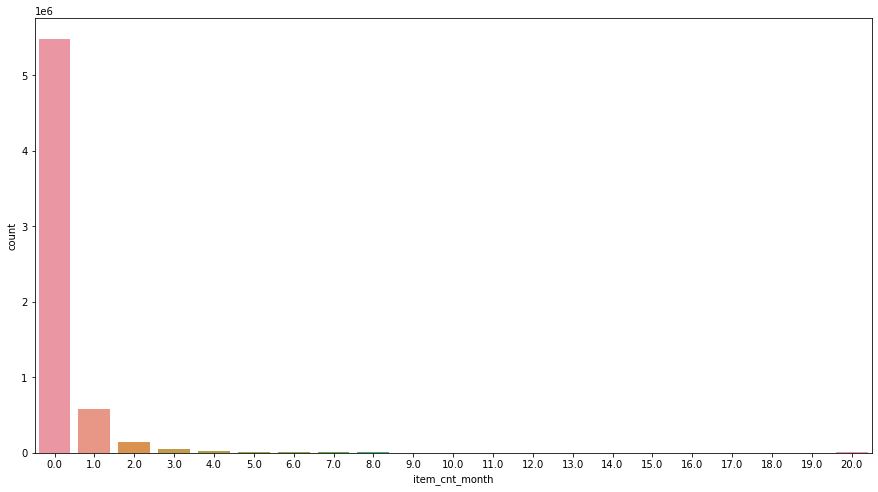

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(data.item_cnt_month)

Como podemos comprobar tenemos muchas ventas que son 0, osea productos que no se han vendido, recordamos que deseamos obtener el total de las ventas por mes por artículo

In [7]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)


In [5]:
from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle
sys.version_info

sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)

In [8]:
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=5000,
    min_child_weight=500, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts


[0]	validation_0-rmse:1.05604	validation_1-rmse:1.02979
[1]	validation_0-rmse:0.97384	validation_1-rmse:0.96818
[2]	validation_0-rmse:0.92405	validation_1-rmse:0.93692
[3]	validation_0-rmse:0.89223	validation_1-rmse:0.92172
[4]	validation_0-rmse:0.87235	validation_1-rmse:0.91239
[5]	validation_0-rmse:0.86069	validation_1-rmse:0.90692
[6]	validation_0-rmse:0.85278	validation_1-rmse:0.90465
[7]	validation_0-rmse:0.84742	validation_1-rmse:0.90163
[8]	validation_0-rmse:0.84283	validation_1-rmse:0.90042
[9]	validation_0-rmse:0.83953	validation_1-rmse:0.89939
[10]	validation_0-rmse:0.83786	validation_1-rmse:0.89926
[11]	validation_0-rmse:0.83613	validation_1-rmse:0.89858
[12]	validation_0-rmse:0.83504	validation_1-rmse:0.89760
[13]	validation_0-rmse:0.83252	validation_1-rmse:0.89673
[14]	validation_0-rmse:0.83059	validation_1-rmse:0.89880
[15]	validation_0-rmse:0.82917	validation_1-rmse:0.89929
[16]	validation_0-rmse:0.82603	validation_1-rmse:0.89605
[17]	validation_0-rmse:0.82517	validation

538.7976713180542

In [12]:
Y_pred = model.predict(X_valid).clip(0,20)
Y_test = model.predict(X_test).clip(0.20)


(array([2.49316e+05, 3.19900e+03, 1.27200e+03, 2.46000e+02, 1.44000e+02,
        8.60000e+01, 5.50000e+01, 3.00000e+01, 1.60000e+01, 4.70000e+01]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
       dtype=float32),
 <BarContainer object of 10 artists>)

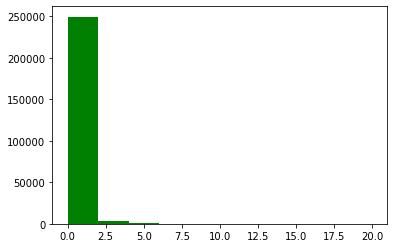

In [13]:
plt.hist(Y_pred, color= 'green')


(array([2.24678e+05, 2.81700e+03, 1.36400e+03, 3.44000e+02, 9.60000e+01,
        6.60000e+01, 4.40000e+01, 2.50000e+01, 2.30000e+01, 4.30000e+01]),
 array([ 0.2      ,  2.2511036,  4.3022075,  6.353311 ,  8.404415 ,
        10.455519 , 12.506622 , 14.557726 , 16.60883  , 18.659933 ,
        20.711037 ], dtype=float32),
 <BarContainer object of 10 artists>)

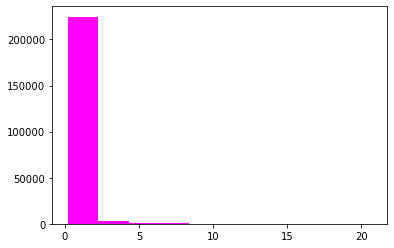

In [14]:
plt.hist(Y_test, color='magenta')

(array([2.24678e+05, 2.81700e+03, 1.36400e+03, 3.44000e+02, 9.60000e+01,
        6.60000e+01, 4.40000e+01, 2.50000e+01, 2.30000e+01, 4.30000e+01]),
 array([ 0.2      ,  2.2511036,  4.3022075,  6.353311 ,  8.404415 ,
        10.455519 , 12.506622 , 14.557726 , 16.60883  , 18.659933 ,
        20.711037 ], dtype=float32),
 <BarContainer object of 10 artists>)

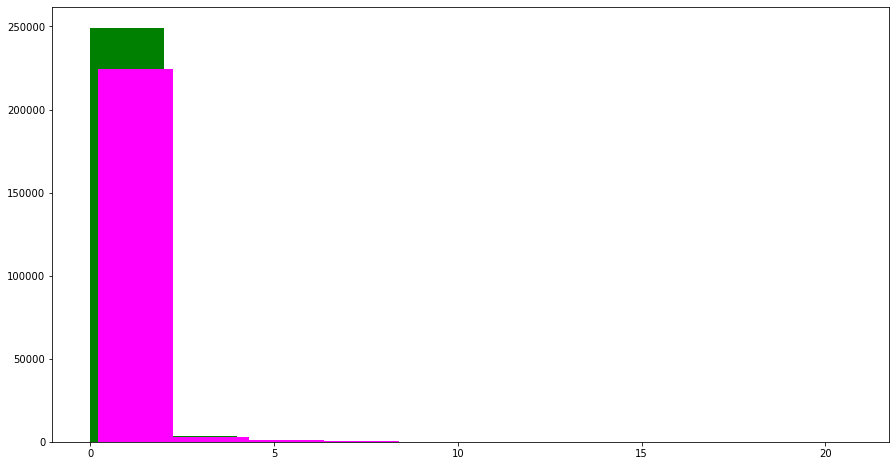

In [15]:
plt.figure(figsize=(15,8))
plt.hist(Y_pred, color='green')
plt.hist(Y_test, color= 'magenta')

Al graficar, podemos comprobar el fallo del modelo

Graficamos la importancia de las variables

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

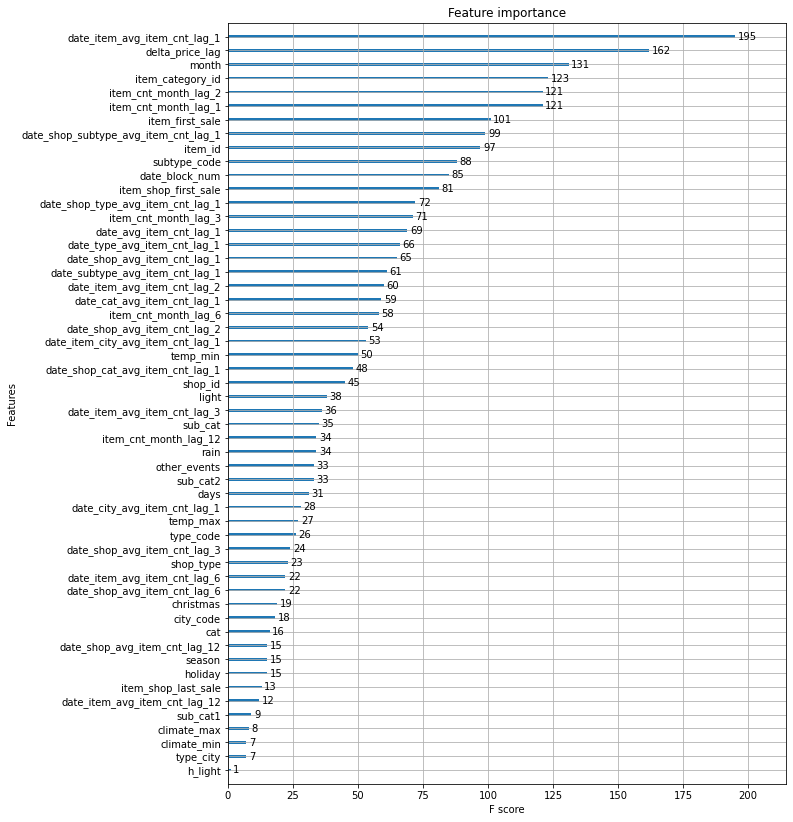

In [16]:
plot_features(model, (10,14))

In [18]:
print(model.predict(X_valid.iloc[5000:5001,:]))
print(Y_test[5000])

[0.08601701]
0.2


# Conclusiones

En cuanto al modelo, es un resultado fantástico, para un primer modelaje, se equivoca en solo 0,89 unidades de venta por producto al mes.
En próximas evoluciones se intentara bajar hasta un 0,65, ampliando los phiperparámetros y utilizando redes neuronales.

En cuanto a los datos, he comprobado que son demasiados productos y pocas ventas de estos, ya que las ventas mensuales van de 0 a 20, si las ventas fueran mayores o la lista de productos mas escueta, los resultados del modelo aumentarían bastante.

Este modelo se puede extrapolar a tiendas españolas y europeas,se podrían añadir variables que mejorarían el modelo, variables que no se han podido obtener por no tener datos de rusia, como el paro de cada ciudad donde se encuntran, las tiendas, asi como la renta media, etc.